# [IMDB Top 250 Movies](https://www.imdb.com/chart/top/?ref_=nv_mv_250)
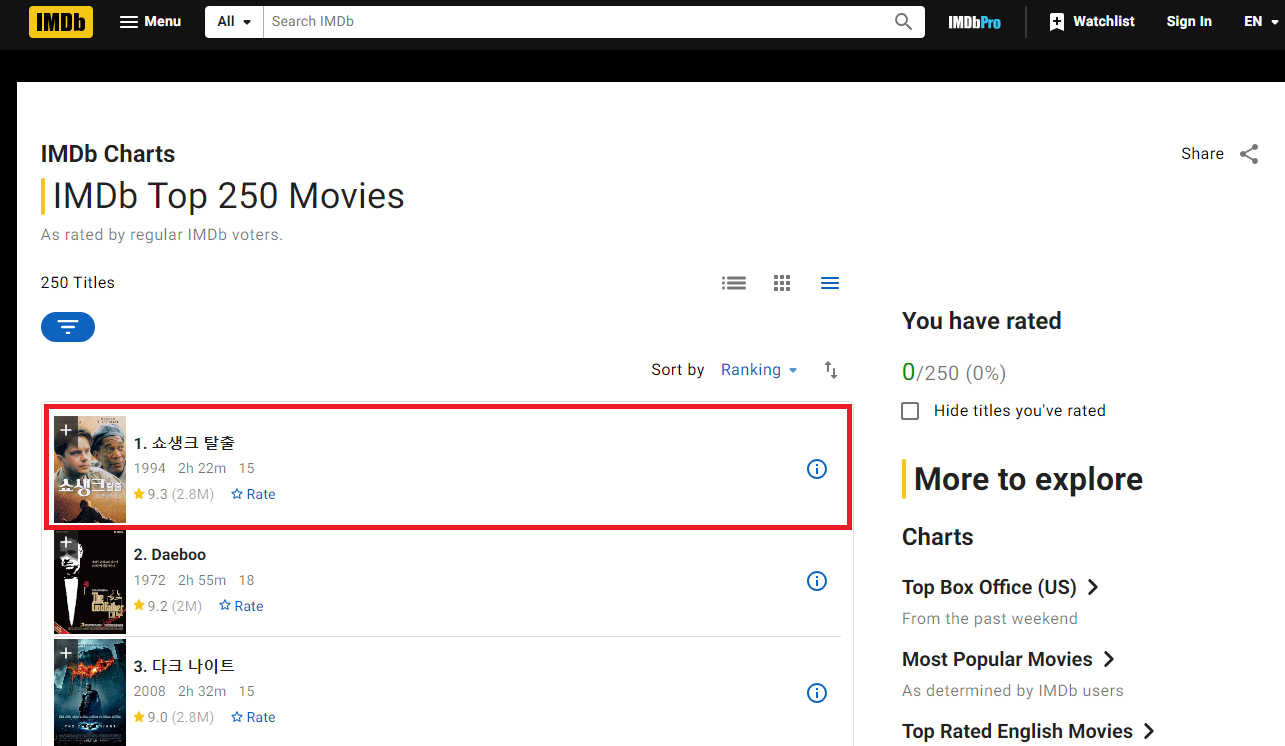

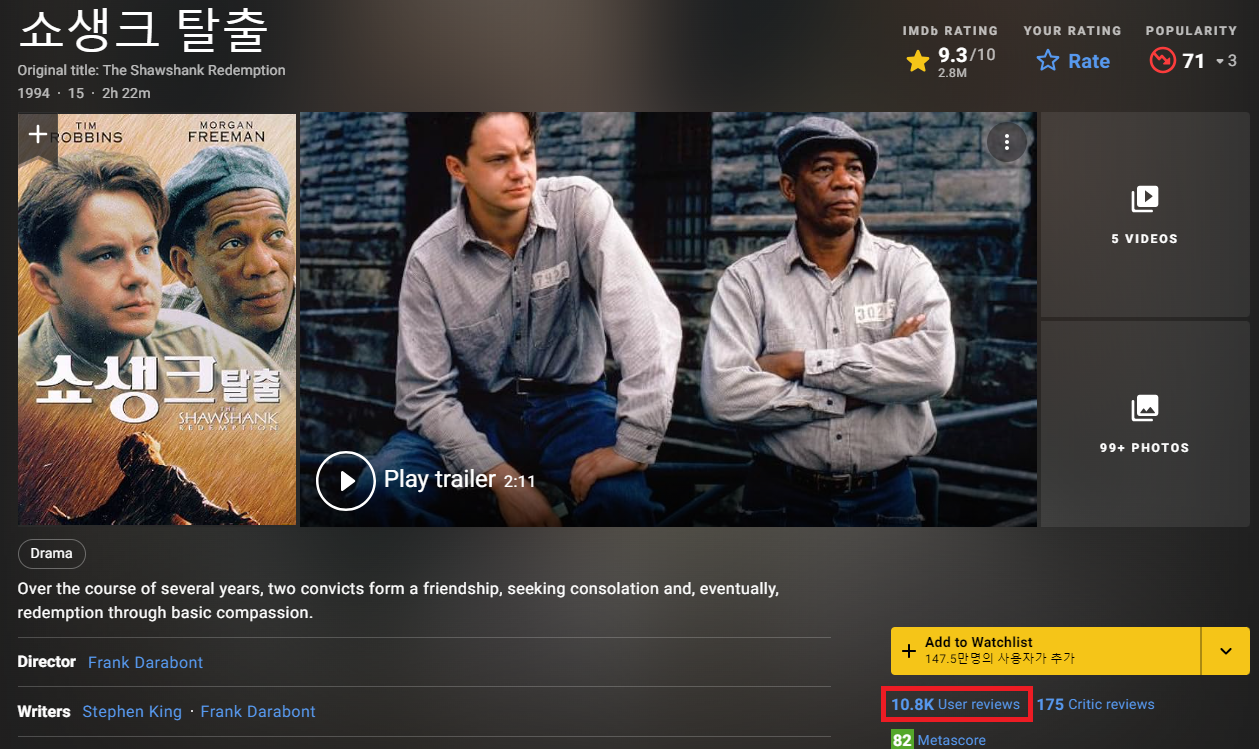

# [쇼생크 탈출 리뷰 페이지](https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ov_rt)
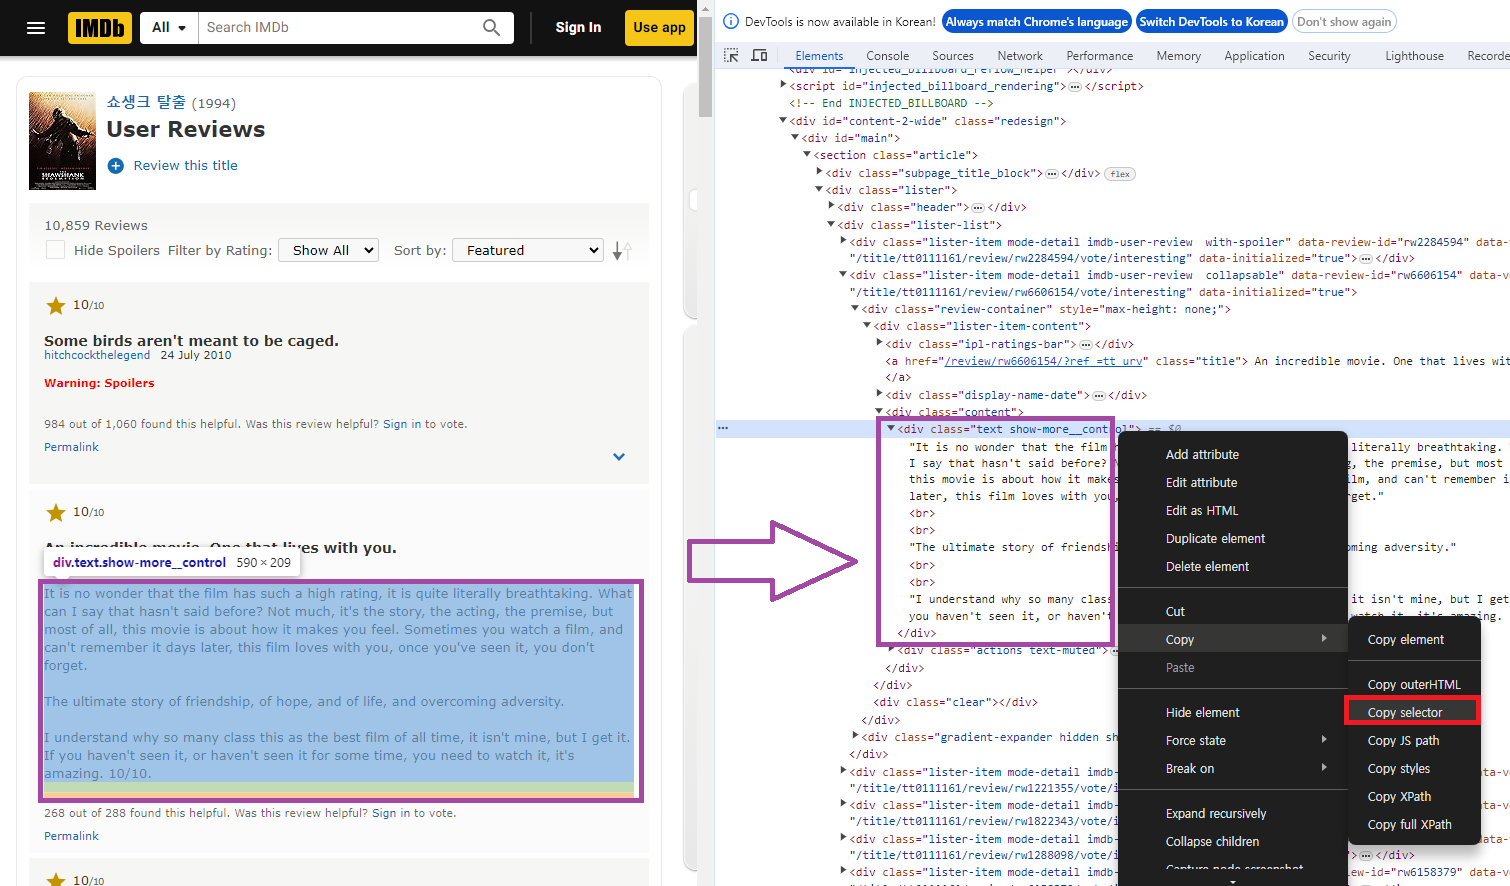

# 영화 리뷰데이터 크롤링

In [2]:
import requests
from bs4 import BeautifulSoup as bs 

import json 
import pandas as pd 

import hdfs 

### 크롤링 성공

In [3]:
url = "https://www.imdb.com/title/tt0111161/reviews/?ref_=tt_ov_rt"
custom_header = {
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36",
    "referer": "https://www.google.com/"
}
response = requests.get(url, headers=custom_header)
response.raise_for_status()
response.status_code

200

### HTML 데이터 파싱

In [5]:
soup = bs(response.text, "html.parser")

### 리뷰데이터 추출

In [15]:
reviews_list = soup.find_all('div', class_='text show-more__control')
len(reviews_list) 

25

In [16]:
reviews_list[0].text

'The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn\'t give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award time the

In [17]:
review_texts = [ review.text for review in reviews_list ]
print(len(review_texts))
review_texts[0]

25


'The Shawshank Redemption is written and directed by Frank Darabont. It is an adaptation of the Stephen King novella Rita Hayworth and Shawshank Redemption. Starring Tim Robbins and Morgan Freeman, the film portrays the story of Andy Dufresne (Robbins), a banker who is sentenced to two life sentences at Shawshank State Prison for apparently murdering his wife and her lover. Andy finds it tough going but finds solace in the friendship he forms with fellow inmate Ellis "Red" Redding (Freeman). While things start to pick up when the warden finds Andy a prison job more befitting his talents as a banker. However, the arrival of another inmate is going to vastly change things for all of them.There was no fanfare or bunting put out for the release of the film back in 94, with a title that didn\'t give much inkling to anyone about what it was about, and with Columbia Pictures unsure how to market it, Shawshank Redemption barely registered at the box office. However, come Academy Award time the

- 저장하기

In [19]:
with open("review_texts.txt", "w",  encoding='utf8') as file:
    file.writelines(review_texts)

### 리뷰제목 추출

In [21]:
review_titles = soup.find_all('a', class_='title')
len(review_titles) 

25

In [22]:
review_titles[0].text

" Some birds aren't meant to be caged.\n"

In [23]:
review_titles = [ review.text for review in review_titles ]
print(len(review_titles))
review_titles[0]

25


" Some birds aren't meant to be caged.\n"

- 저장하기

In [24]:
with open("review_titles.txt", "w",  encoding='utf8') as file:
    file.writelines(review_titles)